Data Description
Given is the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [1]:
# Important libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import itertools as it
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.metrics import mean_squared_error        # Compute mean square error
from sklearn.model_selection import train_test_split   # Splitting dataset into training and test data
from sklearn.linear_model import Lasso              #Lasso Regression
from sklearn.neighbors import KNeighborsRegressor   #KNN Neighbor
from sklearn.svm import SVR          # SVM
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:\\Users\\Garima\\Downloads\\concrete_data (1).csv") # Create a dataframe

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##### Problem statement
###### Build a machine Learning model which can predict the strength of mixture for given ingrediant like cement,slaf,ash,water,superplastic,coarseagg,fineagg,age.

In [29]:
# Data Structuring
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])
print(df.info())

Number of rows 1030
Number of columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [30]:
# Missing Values
print('Number of missing values', df.isnull().sum())
'The dataset contains no missing values'

Number of missing values cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


'The dataset contains no missing values'

In [9]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df.iloc[:,-1]

# plotting the distribution without any trasnformation


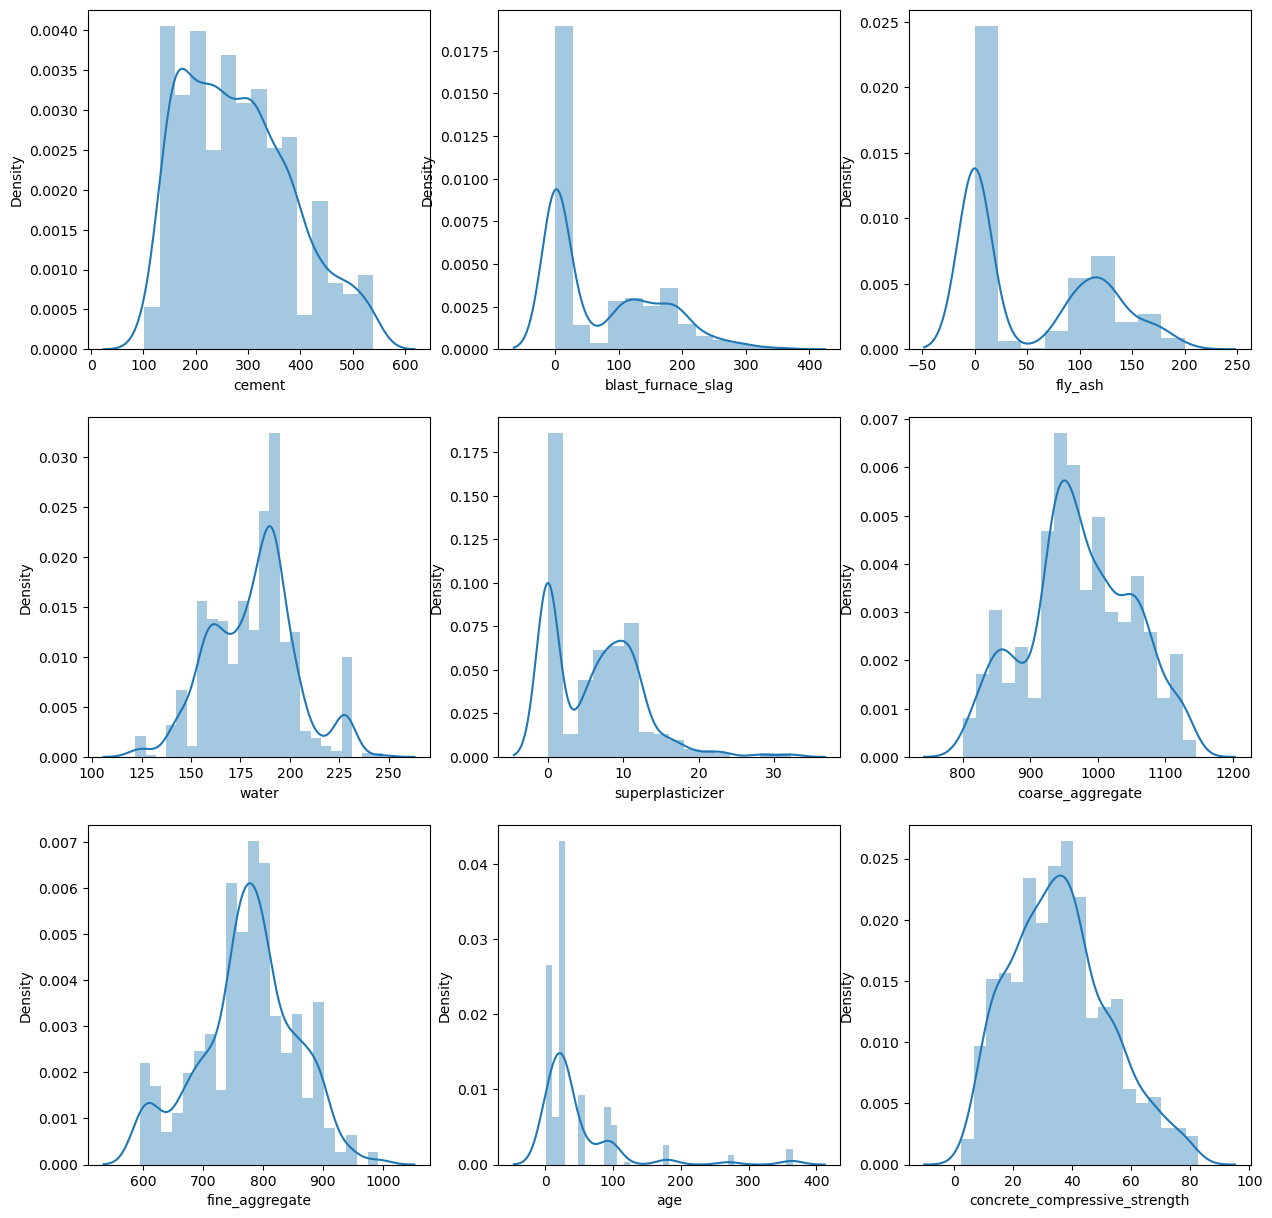

In [10]:
plt.figure(figsize=(15,15))
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

## Data Transformation


In [11]:
from sklearn.preprocessing import PowerTransformer

In [12]:
# Applying Box-Cox Transform

pt = PowerTransformer()
X_transformed = pt.fit_transform(X)


In [13]:
X_transformed   #it is giving us a numpy array 

array([[ 1.99434215, -1.05753028, -0.90276333, ...,  0.86215986,
        -1.20848462,  0.11173195],
       [ 1.99434215, -1.05753028, -0.90276333, ...,  1.05711443,
        -1.20848462,  0.11173195],
       [ 0.60741514,  1.00147565, -0.90276333, ..., -0.53050026,
        -2.0857493 ,  2.12972506],
       ...,
       [-1.45622517,  0.99204373,  1.08886628, ..., -1.03605702,
         0.03769409,  0.11173195],
       [-1.29079026,  1.11771846, -0.90276333, ...,  0.20979943,
         0.15116845,  0.11173195],
       [-0.04398831,  0.85233082,  0.98876735, ..., -1.39051479,
        -0.194756  ,  0.11173195]])

In [14]:
#converting into dataframe

In [15]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

In [16]:
X_transformed

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692
4,-0.744998,0.969970,-0.902763,0.496978,-1.225815,0.065405,0.629012,2.389241
...,...,...,...,...,...,...,...,...
1025,0.108575,0.913437,1.032900,-0.080927,0.679902,-1.319486,-0.109853,0.111732
1026,0.521344,-1.057530,1.107519,0.681864,0.839200,-1.979236,0.469048,0.111732
1027,-1.456225,0.992044,1.088866,0.529385,0.327196,-1.036057,0.037694,0.111732
1028,-1.290790,1.117718,-0.902763,-0.268951,0.927490,0.209799,0.151168,0.111732


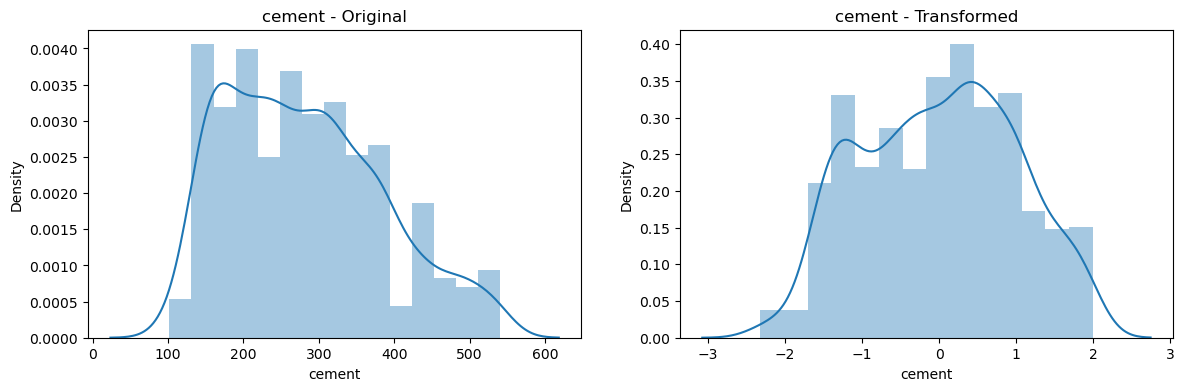

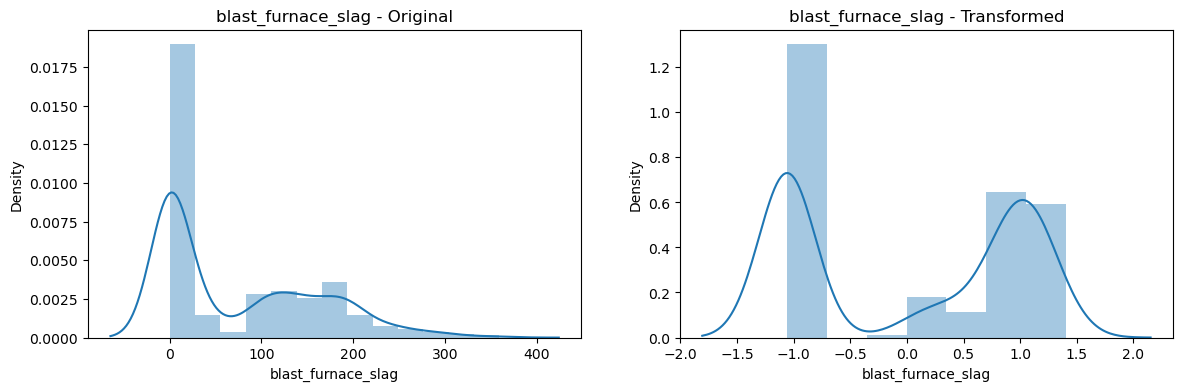

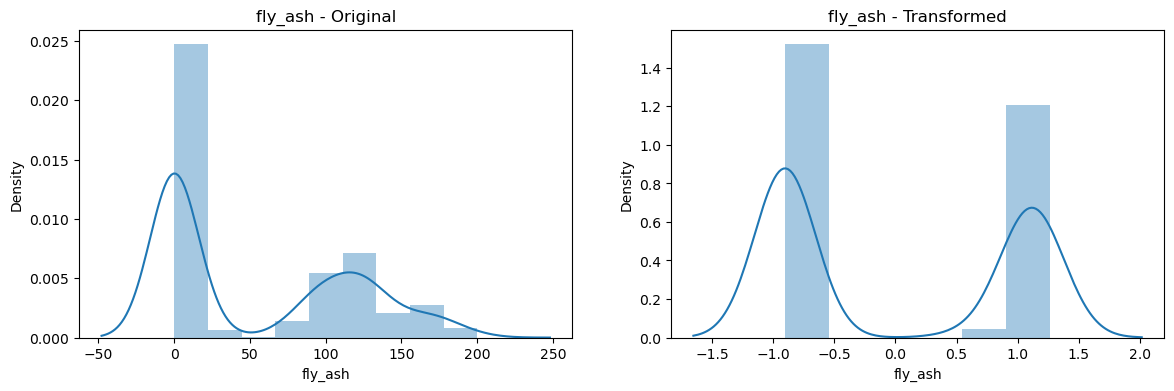

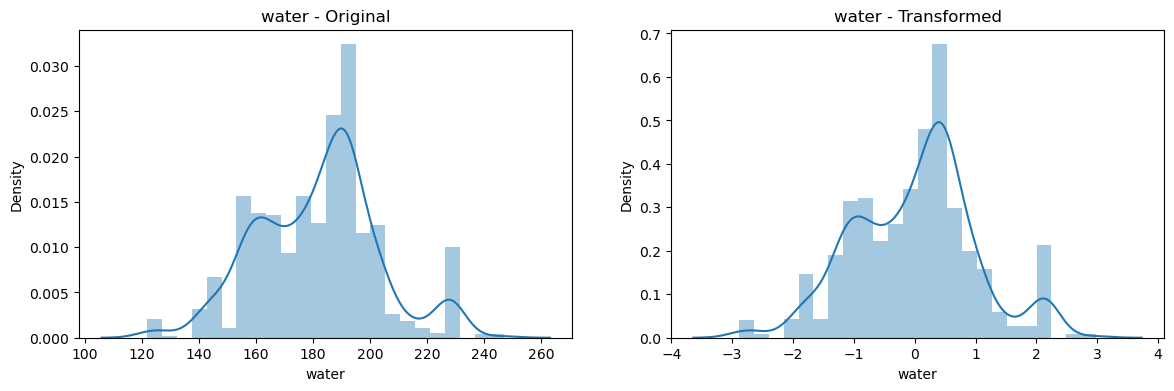

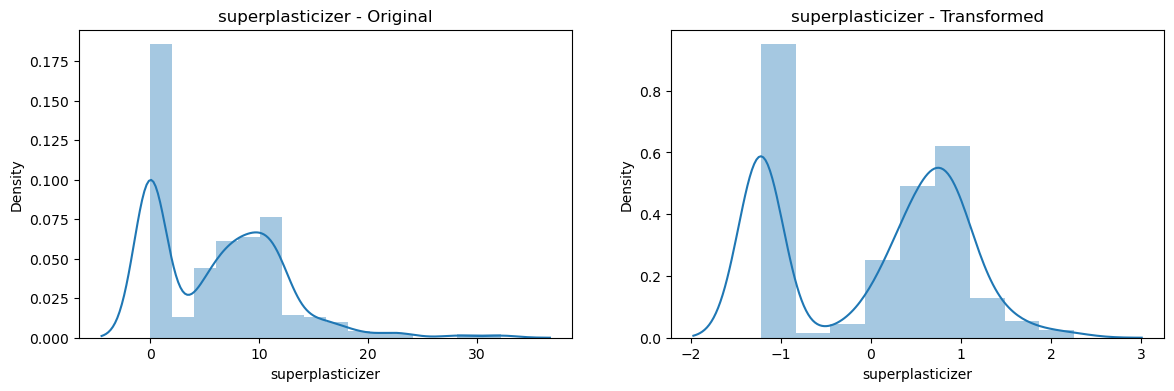

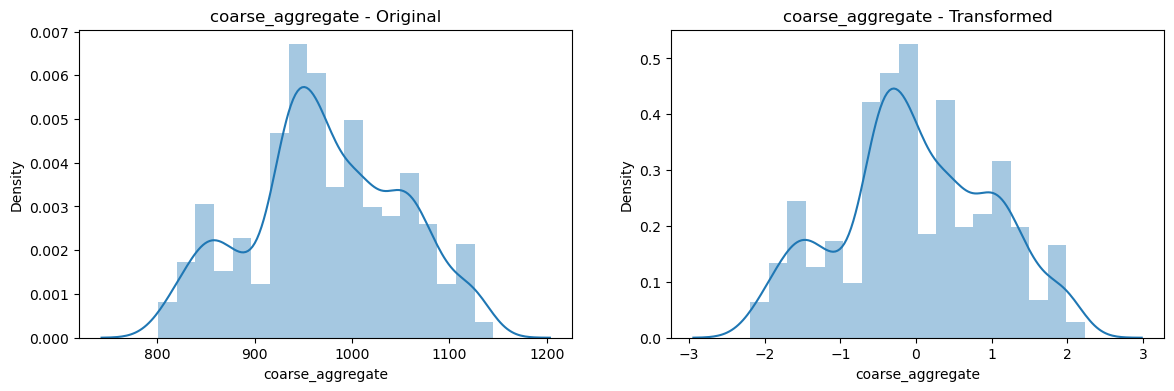

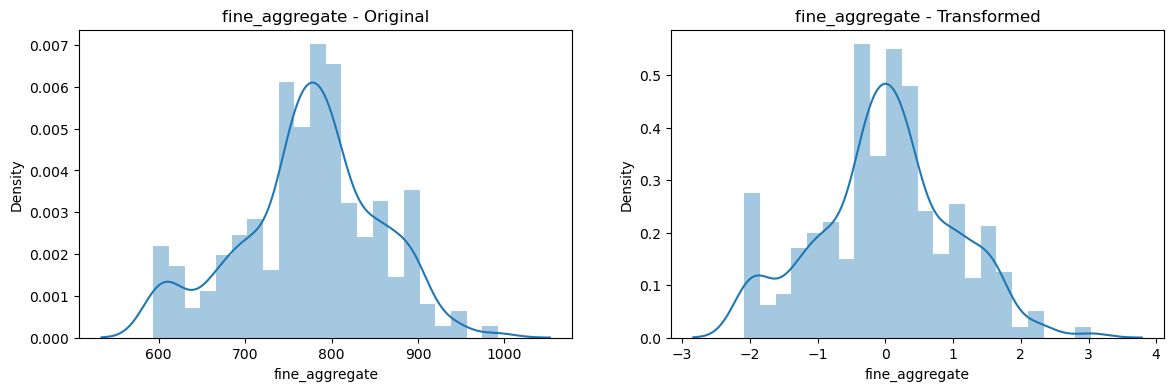

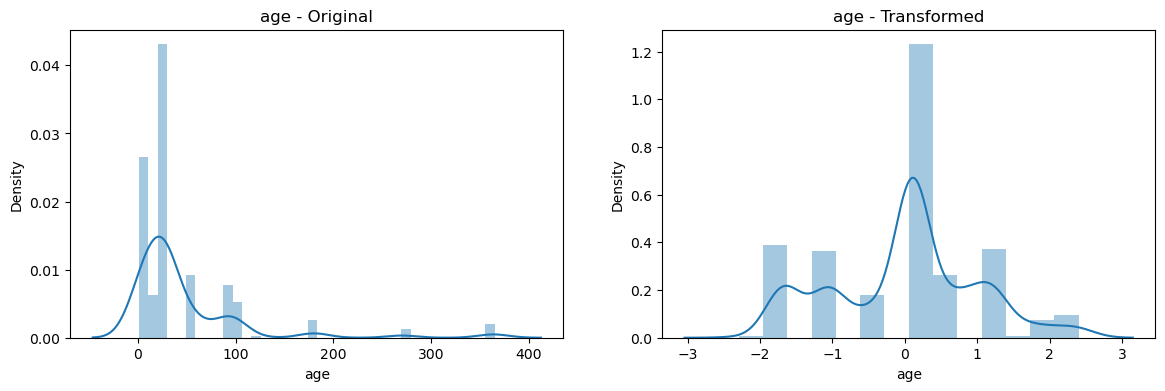

In [17]:
# Before and after comparision for Box-Cox Plot
for col in X_transformed.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.distplot(X[col], ax=axes[0])
    axes[0].set_title(f"{col} - Original")

    sns.distplot(X_transformed[col], ax=axes[1])
    axes[1].set_title(f"{col} - Transformed")

    plt.show()

## Checking for Outlier using boxplot


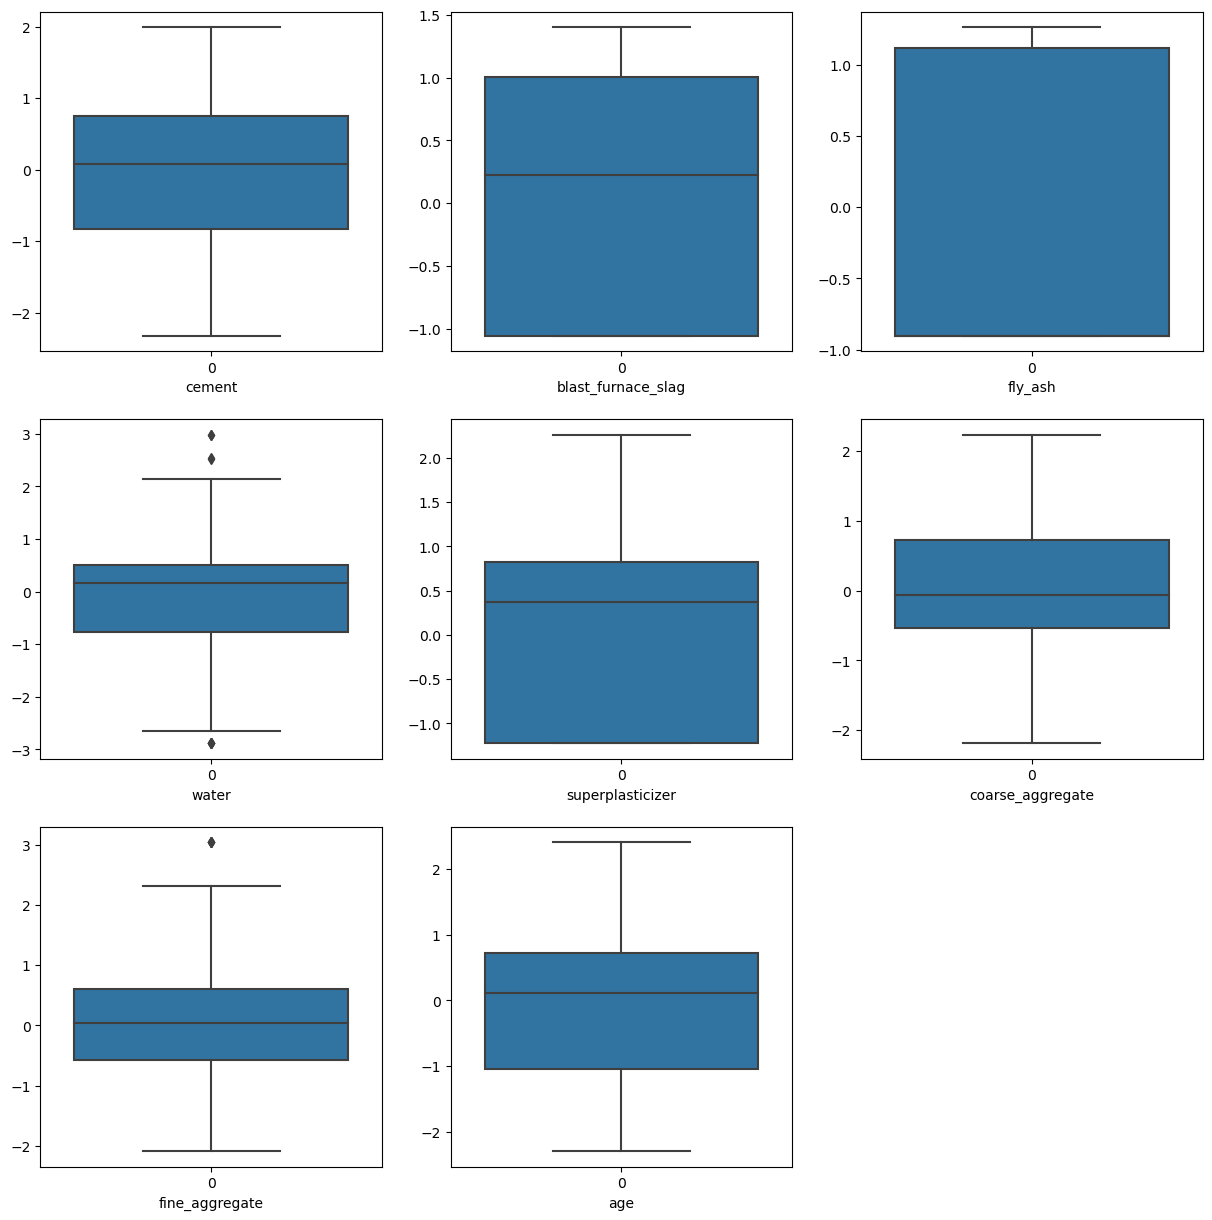

In [18]:
# let's check for outliers 

plt.figure(figsize=(15,15))
plotnumber = 1

for column in X_transformed.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot((X_transformed[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [19]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [20]:
cols = ["water","fine_aggregate"]

for col in cols:
    Q1 = X_transformed[col].quantile(0.25)
    Q3 = X_transformed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5) * IQR
    upper_bound = Q3 + (1.5) * IQR

    X_transformed= X_transformed[(X_transformed[col] >= lower_bound) & (X_transformed[col] <= upper_bound)]


In [21]:
X_transformed

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692
4,-0.744998,0.969970,-0.902763,0.496978,-1.225815,0.065405,0.629012,2.389241
...,...,...,...,...,...,...,...,...
1025,0.108575,0.913437,1.032900,-0.080927,0.679902,-1.319486,-0.109853,0.111732
1026,0.521344,-1.057530,1.107519,0.681864,0.839200,-1.979236,0.469048,0.111732
1027,-1.456225,0.992044,1.088866,0.529385,0.327196,-1.036057,0.037694,0.111732
1028,-1.290790,1.117718,-0.902763,-0.268951,0.927490,0.209799,0.151168,0.111732


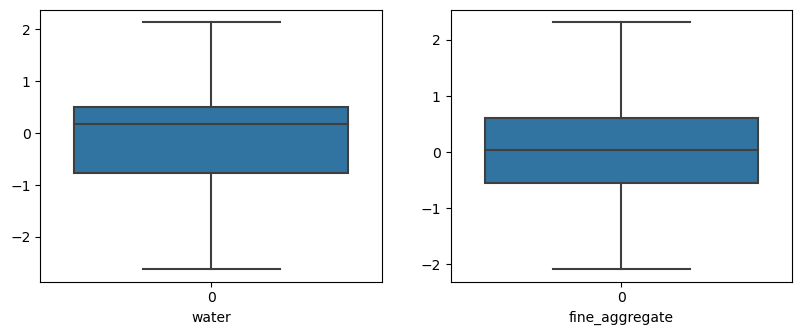

In [22]:
# after removing the outliers

plt.figure(figsize=(15,12))
plotnumber = 1

for column in cols:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(X_transformed[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

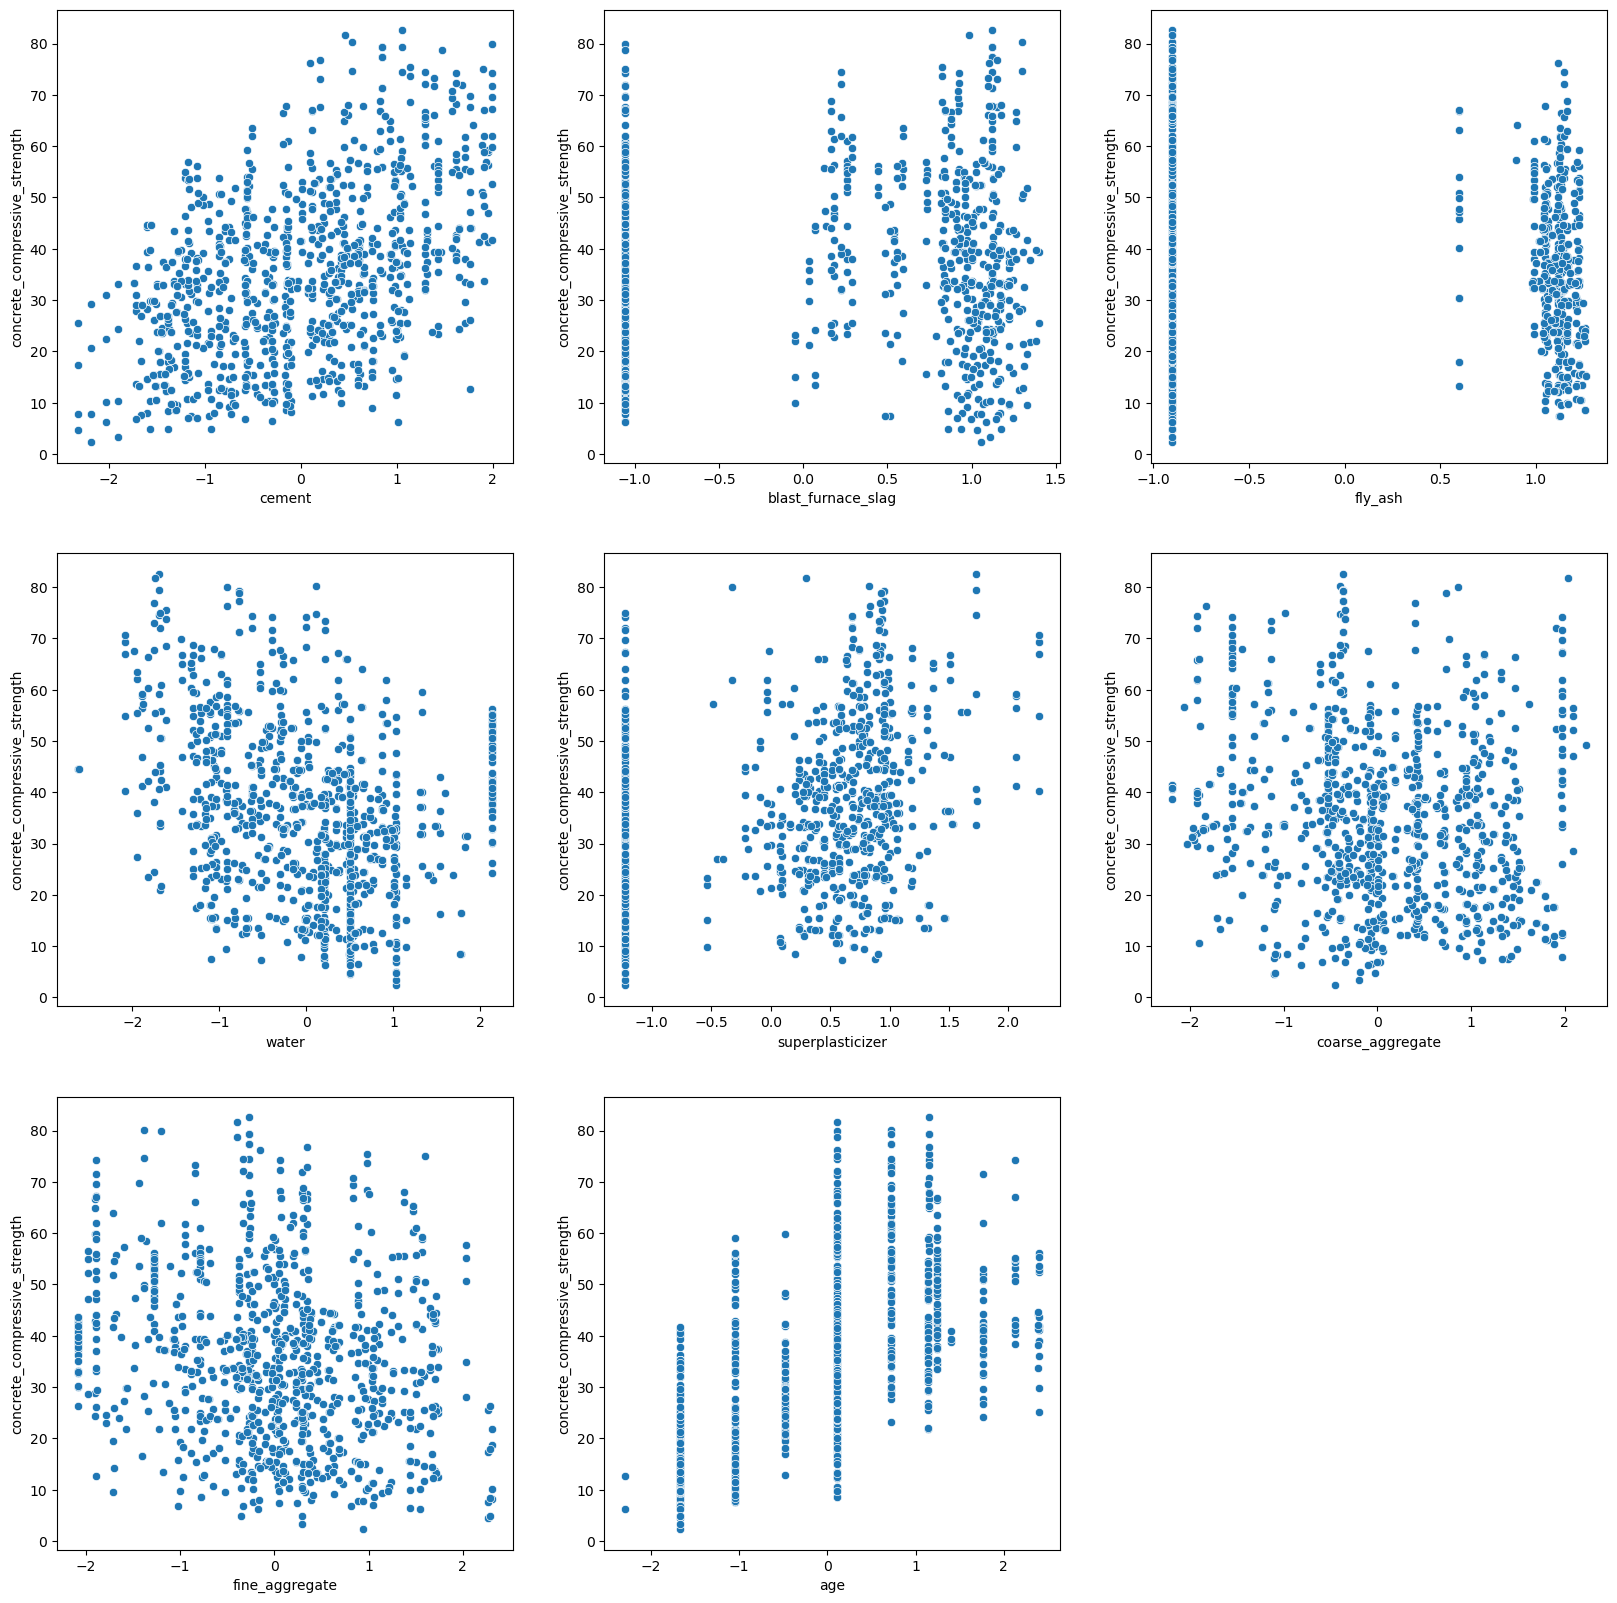

In [23]:
# let's check how our features are related to the target column
plt.figure(figsize=(20,20))
plotnumber = 1

for column in X_transformed.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.scatterplot(x=X_transformed[column],y=y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [24]:
# Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
# We will also Random forest regressor and compare our results from both the models.

###  let's check for correaltion using heatmap

<Axes: >

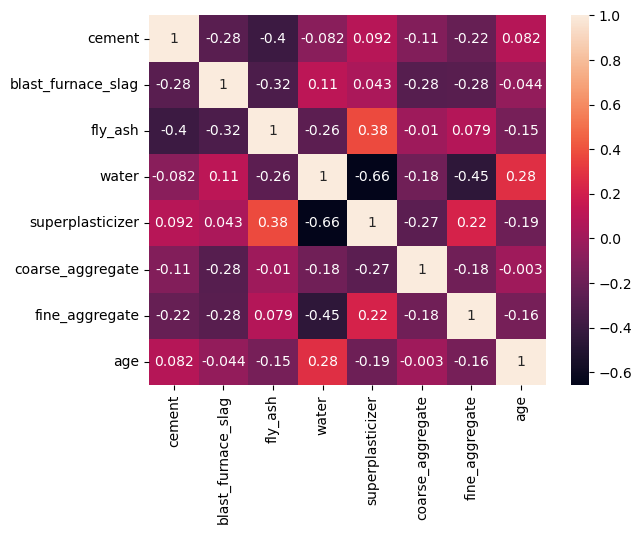

In [25]:
sns.heatmap(X.corr(),annot = True)    #none of our columns seem to be correlated.

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1016, 1030]